In [5]:
from PIL import Image, ImageDraw
import numpy as np

In [329]:
## É necessária fazer a conversão de milímetros para pixels para seguir a especificação
## Abaixo a explicação da fórmula

# 1 Polegada é igual a 25.4mm
# DPI significa dots per inch, ou em português, pontos por polegada, ENTÃO
# 96 dpi significa 96 pontos para cada polegada
# O tamanho de um bit, é de 0,25mm
# Cada bloco tem 8 bits, fazendo com que cada bloco contenha 2mm
# PIXELS = DPI * TAMANHO_TOTAL_EM_MILIMETROS / TAMANHO_DE_UMA_POLEGADA_EM_MILIMETROS
# 
# O QR Code, necessita também, de uma margem de 4 blocos de cada lado, sendo assim
# vamos precisar definir o valor de margem como 8 blocos na horizontal e 8 na vertical
# 4 na direita, 4 na esquerda, 4 em cima e 4 embaixo.

UMA_POLEGADA = 25.4
DPI = 96
TAMANHO_DE_UM_BLOCO = 2
MAGEM_EM_BLOCOS = 8

tamanho_em_pixels =  DPI * TAMANHO_DE_UM_BLOCO / UMA_POLEGADA

NUMERO_DE_BLOCOS = 21 
print(tamanho_em_pixels)

MARGIN = int(tamanho_em_pixels * MAGEM_EM_BLOCOS + 1)
IMAGE_SIZE = int(tamanho_em_pixels * NUMERO_DE_BLOCOS + 1)
GRAY = (150, 150, 150)
WHITE = (255, 255, 255)
RED = (255, 0, 0)
BLACK = (0, 0, 0)

print(IMAGE_SIZE)

7.559055118110237
159


In [314]:
def print_vector(matrix):
    for array in matrix:
        print(array)    

In [315]:
def merge_matrix(origin_matrix, values_to_override, axis = [0, 0]):
    for i, array in enumerate(origin_matrix):
        if i > 6 :
            break
            
        for j, value in enumerate(array):
            if j > 6:
                break
                
            origin_matrix[i + axis[0]][j + axis[1]] = values_to_override[i][j]

In [316]:
square = np.array(
[
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
])
print_vector(square)

[0 0 0 0 0 0 0]
[0 1 1 1 1 1 0]
[0 1 0 0 0 1 0]
[0 1 0 0 0 1 0]
[0 1 0 0 0 1 0]
[0 1 1 1 1 1 0]
[0 0 0 0 0 0 0]


In [345]:
blocks_matrix = np.zeros((21, 21), dtype=int)
merge_matrix(blocks_matrix, square, [0, 0])
merge_matrix(blocks_matrix, square, [blocks_matrix.shape[0] - 7, 0])
merge_matrix(blocks_matrix, square, [0, blocks_matrix.shape[0] - 7])
print_vector(blocks_matrix)    


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
[0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [342]:
def draw_square(x, y, size, color):
    incremento_de_margem = (MARGIN) / 2
    x_axis = x + incremento_de_margem
    y_axis = y + incremento_de_margem
    width = x + size + incremento_de_margem
    height = y + size + incremento_de_margem
    draw.rectangle([x_axis, y_axis, width, height], fill=color)

def draw_qr_code(matrix):
    for i, array in enumerate(matrix):
        for j, value in enumerate(array):
            if value == 0:
                draw_square(j * tamanho_em_pixels, i * tamanho_em_pixels, tamanho_em_pixels, BLACK)
            else:
                draw_square(j * tamanho_em_pixels, i * tamanho_em_pixels, tamanho_em_pixels, WHITE)

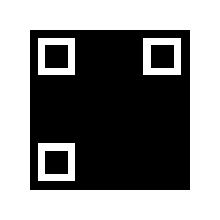

In [343]:
image = Image.new("RGB", (IMAGE_SIZE + MARGIN, IMAGE_SIZE + MARGIN), WHITE)
draw = ImageDraw.Draw(image)

draw_square(0, 0, 20,BLACK)

image.info = {'dpi': (96, 96)}

draw_qr_code(blocks_matrix)
image